In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '..')
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 9)
plt.rcParams['font.size'] = 16
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

import covid19

PALETTE = sns.color_palette()

## data

In [3]:
istat_path = 'comuni_giornaliero.csv'
_, istat = covid19.data.read_istat(istat_path)
# _, istat_all = covid19.data.read_istat(istat_path, drop=False)
istat = istat.sel(time=slice(None, '2020-04-30'))
istat

<xarray.DataArray (year: 6, time: 121, age_class: 6, location: 7898)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan,  1.],
         [ 0., nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 1., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0., nan, nan, ..., nan,  1., nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 1., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan,  0., nan]],

        ...,

        [[ 1., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 1., nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 1., nan, nan, ..., nan, nan, nan],
         [ 1., nan, nan, ..., nan,  0., nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan,  0., ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan,  0.],
         [ 0., nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0., nan, nan, ..., nan,  0., nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan,  0., nan]],

        ...,

        [[ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 1., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan,  0., nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan,  0., ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan,  0.],
         [ 1., nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 1., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

      

In [4]:
istat.sel(year=2020).sum('location')

<xarray.DataArray (time: 121, age_class: 6)>
array([[  53.,   71.,  161.,  329.,  734.,  495.],
       [  41.,   85.,  162.,  375.,  707.,  473.],
       [  41.,   87.,  164.,  350.,  741.,  488.],
       [  46.,   80.,  137.,  360.,  708.,  501.],
       [  39.,   73.,  143.,  356.,  729.,  464.],
       [  47.,   66.,  163.,  343.,  734.,  517.],
       [  52.,   81.,  164.,  344.,  724.,  491.],
       [  56.,   62.,  167.,  355.,  724.,  463.],
       [  40.,   74.,  164.,  364.,  748.,  530.],
       [  42.,   78.,  167.,  384.,  762.,  486.],
       [  39.,   75.,  133.,  376.,  664.,  481.],
       [  56.,   73.,  142.,  346.,  709.,  506.],
       [  47.,   95.,  149.,  333.,  738.,  525.],
       [  51.,   86.,  155.,  345.,  753.,  510.],
       [  40.,   72.,  144.,  357.,  738.,  488.],
       [  42.,   90.,  160.,  342.,  755.,  442.],
       [  50.,   78.,  162.,  366.,  746.,  515.],
       [  51.,   72.,  140.,  319.,  754.,  499.],
       [  39.,   69.,  151.,  358.,  688.,  525.],
       [  62.,   85.,  157.,  314.,  689.,  518.],
       [  40.,   73.,  149.,  341.,  705.,  516.],
       [  48.,   71.,  190.,  352.,  711.,  530.],
       [  42.,   83.,  161.,  366.,  753.,  501.],
       [  45.,   79.,  152.,  361.,  710.,  520.],
       [  56.,   78.,  167.,  369.,  741.,  495.],
       [  38.,   74.,  137.,  316.,  725.,  481.],
       [  59.,   85.,  144.,  359.,  771.,  498.],
       [  55.,   87.,  168.,  344.,  702.,  559.],
       [  36.,   68.,  168.,  360.,  700.,  507.],
       [  42.,   66.,  162.,  319.,  691.,  506.],
       [  55.,   70.,  153.,  363.,  694.,  501.],
       [  46.,   87.,  134.,  341.,  687.,  497.],
       [  47.,   80.,  145.,  334.,  670.,  488.],
       [  46.,   75.,  175.,  346.,  712.,  515.],
       [  41.,   77.,  174.,  377.,  678.,  505.],
       [  42.,   64.,  129.,  307.,  673.,  499.],
       [  51.,   88.,  146.,  314.,  717.,  490.],
       [  54.,   75.,  136.,  357.,  696.,  465.],
       [  35.,   75.,  166.,  323.,  710.,  490.],
       [  48.,   78.,  136.,  326.,  709.,  453.],
       [  32.,   74.,  154.,  331.,  670.,  512.],
       [  34.,   67.,  174.,  357.,  715.,  495.],
       [  42.,   78.,  153.,  346.,  762.,  494.],
       [  50.,   80.,  164.,  338.,  685.,  502.],
       [  58.,   86.,  167.,  374.,  703.,  480.],
       [  49.,   87.,  162.,  347.,  640.,  465.],
       [  43.,   76.,  127.,  321.,  636.,  460.],
       [  38.,   65.,  139.,  346.,  642.,  513.],
       [  34.,   65.,  153.,  363.,  675.,  498.],
       [  55.,   70.,  147.,  363.,  703.,  503.],
       [  54.,   70.,  156.,  338.,  626.,  457.],
       [  33.,   67.,  164.,  330.,  651.,  493.],
       [  49.,   71.,  144.,  303.,  666.,  453.],
       [  45.,   73.,  126.,  322.,  685.,  468.],
       [  58.,   70.,  157.,  368.,  748.,  501.],
       [  38.,   77.,  152.,  348.,  767.,  481.],
       [  41.,   70.,  151.,  353.,  684.,  509.],
       [  48.,   81.,  124.,  330.,  677.,  464.],
       [  48.,   78.,  153.,  392.,  674.,  460.],
       [  49.,   67.,  133.,  342.,  693.,  459.],
       [  36.,   60.,  150.,  333.,  686.,  522.],
       [  37.,   72.,  153.,  378.,  739.,  508.],
       [  45.,   72.,  164.,  379.,  751.,  494.],
       [  48.,   73.,  137.,  343.,  709.,  460.],
       [  46.,   82.,  166.,  372.,  775.,  487.],
       [  52.,   80.,  169.,  399.,  825.,  530.],
       [  41.,   69.,  168.,  410.,  798.,  500.],
       [  40.,   90.,  179.,  402.,  785.,  546.],
       [  52.,   91.,  196.,  459.,  914.,  534.],
       [  47.,   92.,  167.,  498.,  956.,  577.],
       [  58.,   80.,  183.,  480.,  944.,  582.],
       [  38.,   92.,  176.,  550.,  969.,  621.],
       [  45.,   95.,  215.,  542., 1052.,  625.],
       [  54.,   76.,  201.,  550., 1042.,  642.],
       [  40.,   76.,  212.,  537., 1019.,  658.],
       [  54.,   93.,  210.,  602., 1032.,  632.],
       [  44.,   80.,  245.,  598., 1117.,  651.],
       [  49.,  105.,  229.,

In [5]:
mar_15_19_averages = istat.sel(time=slice('2020-03-01', '2020-04-30')).fillna(0).mean(['time', 'year'])
mar_15_19_averages.sum('location').values

array([ 50.8579235 ,  79.75409836, 168.73224044, 379.0136612 ,
       747.27595628, 475.07103825])

In [6]:
jan_feb_20_averages = istat.sel(year=2020, time=slice('2020-01-01', '2020-02-20')).fillna(0).mean('time')
jan_feb_20_averages.sum('location').values

array([ 46.05882353,  76.52941176, 154.37254902, 347.35294118,
       708.96078431, 496.31372549])

In [7]:
deaths_italy = istat.sel(year=2020).sum('location')

(deaths_italy.sel(time=slice('2020-02-21', '2020-04-30')) - jan_feb_20_averages.sum('location')).sum('time')

<xarray.DataArray (age_class: 6)>
array([ -164.11764706,   476.94117647,  2366.92156863,  8033.29411765,
       14776.74509804,  7743.03921569])
Coordinates:
  * age_class  (age_class) object '0-49' '50-59' '60-69' '70-79' '80-89' '90+'
    year       int64 2020

In [8]:
deaths_italy_fraction = deaths_italy / jan_feb_20_averages.sum('location')

deaths_italy_fraction

<xarray.DataArray (time: 121, age_class: 6)>
array([[1.15070243, 0.92774789, 1.04293154, 0.94716342, 1.0353182 ,
        0.99735303],
       [0.89016603, 1.11068409, 1.04940937, 1.07959356, 0.99723428,
        0.95302623],
       [0.89016603, 1.13681783, 1.06236505, 1.00762066, 1.0451918 ,
        0.98324905],
       [0.99872286, 1.04534973, 0.88746348, 1.03640982, 0.9986448 ,
        1.00944216],
       [0.8467433 , 0.95388163, 0.9263305 , 1.02489416, 1.02826562,
        0.93489254],
       [1.02043423, 0.86241353, 1.05588721, 0.98746825, 1.0353182 ,
        1.04167984],
       [1.12899106, 1.0584166 , 1.06236505, 0.99034716, 1.02121304,
        0.98929362],
       [1.21583653, 0.81014604, 1.08179855, 1.02201524, 1.02121304,
        0.93287769],
       [0.86845466, 0.9669485 , 1.06236505, 1.04792549, 1.05506541,
        1.06787295],
       [0.91187739, 1.01921599, 1.08179855, 1.10550381, 1.07481262,
        0.97921934],
       [0.8467433 , 0.98001537, 0.86155214, 1.08247248, 0.93658213,
        0.96914507],
       [1.21583653, 0.95388163, 0.91985266, 0.996105  , 1.00005531,
        1.01951643],
       [1.02043423, 1.24135281, 0.96519751, 0.95867909, 1.04096026,
        1.05779867],
       [1.10727969, 1.12375096, 1.00406452, 0.99322608, 1.06211799,
        1.02757585],
       [0.86845466, 0.94081476, 0.93280833, 1.02777307, 1.04096026,
        0.98324905],
       [0.91187739, 1.17601845, 1.0364537 , 0.98458933, 1.06493902,
        0.89056574],
       [1.08556833, 1.01921599, 1.04940937, 1.05368332, 1.05224438,
        1.03765013],
       [1.10727969, 0.94081476, 0.90689699, 0.91837426, 1.0635285 ,
        1.00541245],
       [0.8467433 , 0.90161414, 0.97815318, 1.03065199, 0.97043449,
        1.05779867],
       [1.34610473, 1.11068409, 1.0170202 , 0.90397968, 0.97184501,
        1.04369469],
       [0.86845466, 0.95388163, 0.96519751, 0.98171041, 0.99441325,
        1.03966498],
       [1.04214559, 0.92774789, 1.23078877, 1.01337849, 1.00287634,
        1.06787295],
       [0.91187739, 1.08455035, 1.04293154, 1.05368332, 1.06211799,
        1.00944216],
       [0.97701149, 1.03228286, 0.98463102, 1.03928874, 1.00146583,
        1.0477244 ],
       [1.21583653, 1.01921599, 1.08179855, 1.06232007, 1.0451918 ,
        0.99735303],
       [0.82503193, 0.9669485 , 0.88746348, 0.90973751, 1.02262356,
        0.96914507],
       [1.28097063, 1.11068409, 0.93280833, 1.03353091, 1.08750726,
        1.0033976 ],
       [1.19412516, 1.13681783, 1.08827639, 0.99034716, 0.99018171,
        1.12630373],
       [0.7816092 , 0.88854727, 1.08827639, 1.03640982, 0.98736068,
        1.02153129],
       [0.91187739, 0.86241353, 1.04940937, 0.91837426, 0.97466604,
        1.01951643],
       [1.19412516, 0.91468101, 0.99110885, 1.04504657, 0.97889759,
        1.00944216],
       [0.99872286, 1.13681783, 0.86802998, 0.98171041, 0.96902398,
        1.00138274],
       [1.02043423, 1.04534973, 0.93928617, 0.961558  , 0.94504522,
        0.98324905],
       [0.99872286, 0.98001537, 1.13362124, 0.996105  , 1.00428686,
        1.03765013],
       [0.89016603, 1.00614912, 1.1271434 , 1.0853514 , 0.95632934,
        1.01750158],
       [0.91187739, 0.83627978, 0.8356408 , 0.88382727, 0.94927677,
        1.00541245],
       [1.10727969, 1.1498847 , 0.945764  , 0.90397968, 1.01133944,
        0.98727876],
       [1.17241379, 0.98001537, 0.88098565, 1.02777307, 0.98171862,
        0.9369074 ],
       [0.75989783, 0.98001537, 1.07532072, 0.92988992, 1.00146583,
        0.98727876],
       [1.04214559, 1.01921599, 0.88098565, 0.93852667, 1.00005531,
        0.91272914],
       [0.69476373, 0.9669485 , 0.99758669, 0.95292125, 0.94504522,
        1.03160556],
       [0.73818646, 0.8754804 , 1.1271434 , 1.02777307, 1.00851841,
        0.99735303],
       [0.91187739, 1.01921599, 0.99110885, 0.996105  , 1.07481262,
        0.99533818],
       [1.08556833, 1.04534973, 1.06236505, 0.97307367, 0.96620295,
        1.01145702],
       [1.25925926, 1.12375096, 1.08179

## situation report

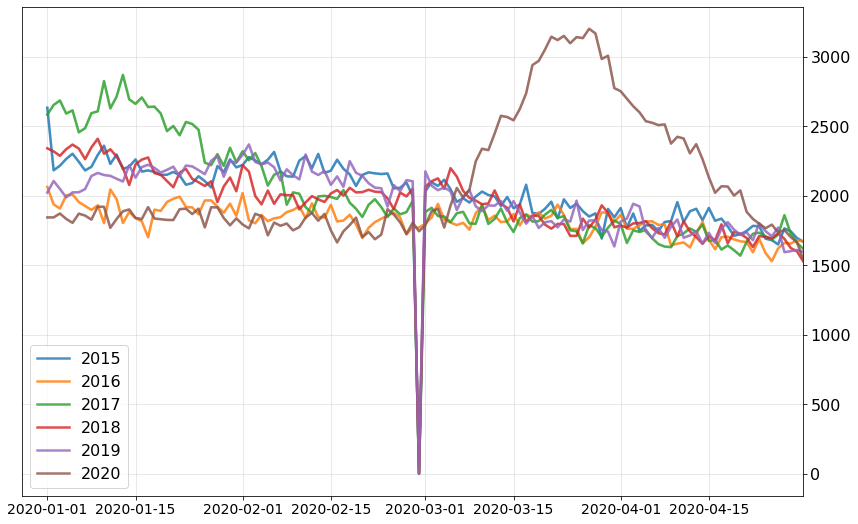

In [9]:
ax = covid19.plot.plot_xarray(istat.sum(['location', 'age_class']), hue='year', xlim=(np.datetime64('2019-12-28'), np.datetime64('2020-04-30')))
_ = ax.legend()

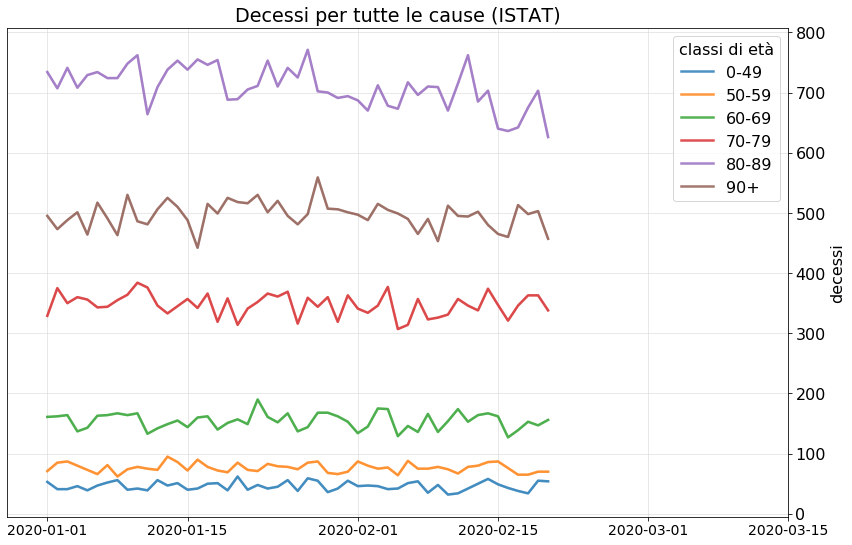

In [10]:
ax = covid19.plot.plot_xarray(deaths_italy.sel(time=slice('2020-01-01', '2020-02-20')), window=1, xlim=(np.datetime64('2019-12-28'), np.datetime64('2020-03-15')))
_ = ax.set(
    title='Decessi per tutte le cause (ISTAT)',
    ylabel='decessi'
)
_ = ax.legend(title='classi di età', loc='upper right')

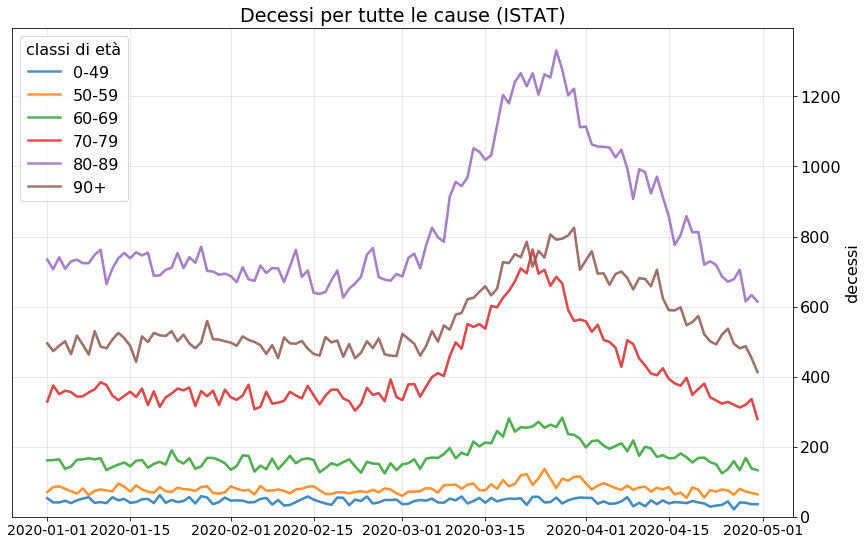

In [11]:
ax = covid19.plot.plot_xarray(deaths_italy, foreground_interval=(None, '2020-04-30'))
_ = ax.set(
    title='Decessi per tutte le cause (ISTAT)',
    ylabel='decessi'
)
_ = ax.legend(title='classi di età')

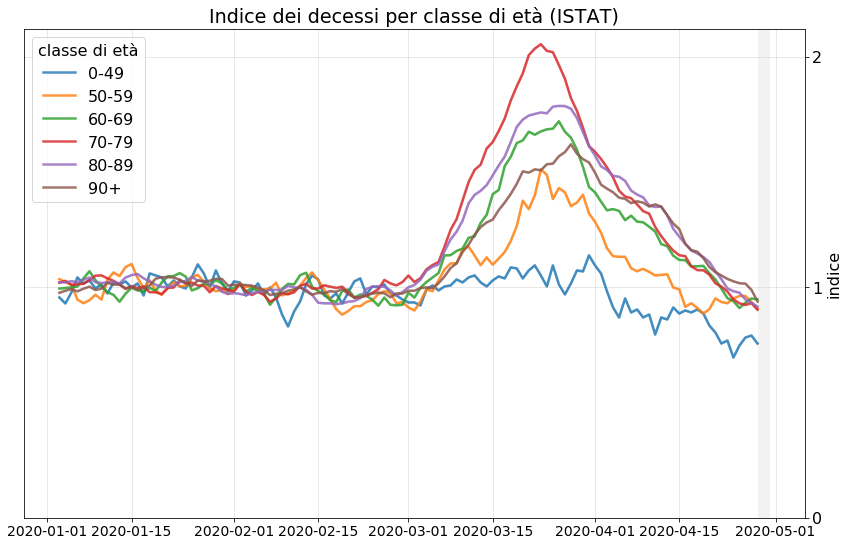

In [12]:
ax = covid19.plot.plot_xarray(deaths_italy_fraction, window=5, foreground_interval=(None, '2020-04-28'))
# foreground_hue=['50-59', '60-69', '70-79', '80-89', '90+']
_ = ax.set(
    title='Indice dei decessi per classe di età (ISTAT)',
    ylabel='indice',
)
_ = ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
_ = ax.legend(title='classe di età')

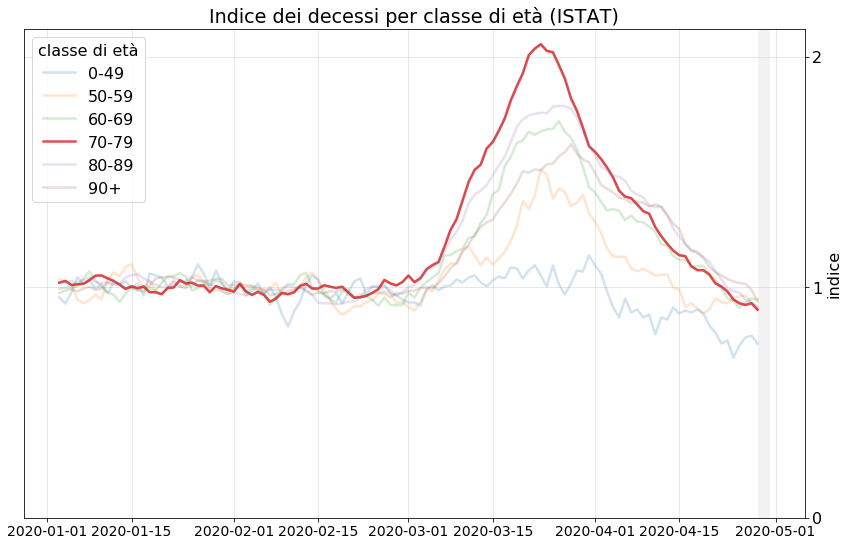

In [13]:
ax = covid19.plot.plot_xarray(deaths_italy_fraction, window=5, foreground_hue=['70-79'], foreground_interval=(None, '2020-04-28'))
# foreground_hue=['50-59', '60-69', '70-79', '80-89', '90+']
_ = ax.set(
    title='Indice dei decessi per classe di età (ISTAT)',
    ylabel='indice',
)
_ = ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
_ = ax.legend(title='classe di età')

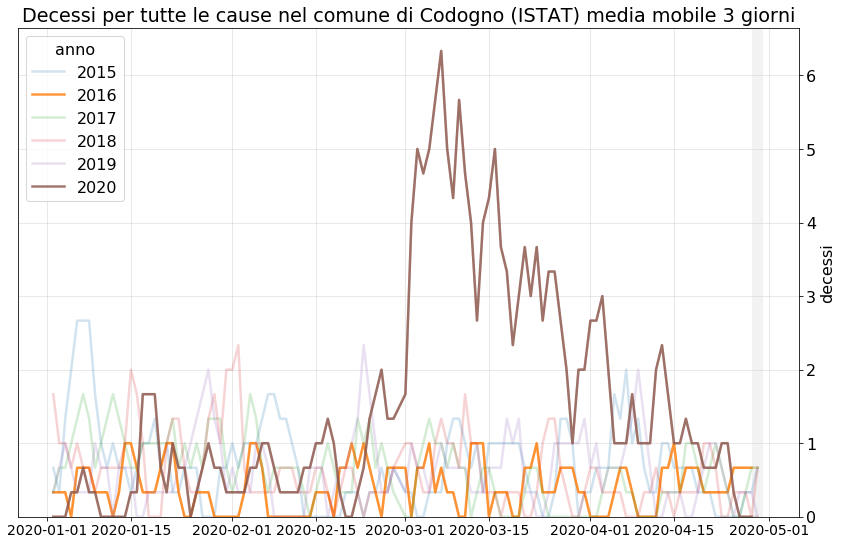

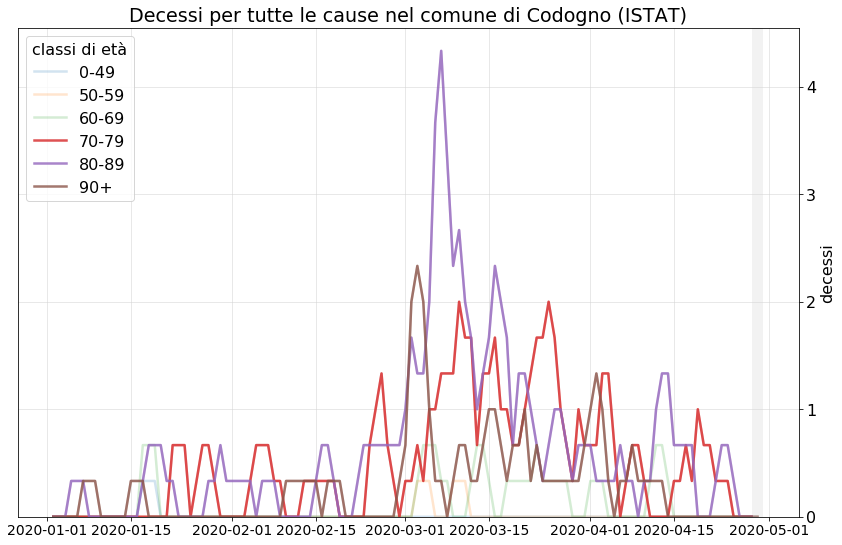

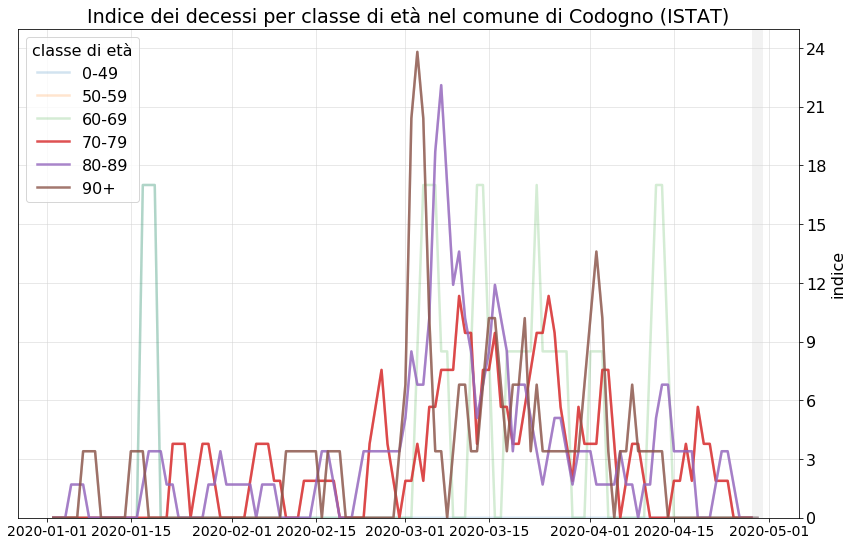

In [14]:
comune = "Codogno"
FI = (None, '2020-04-28')
window = 3

istat_comune = istat.sel(year=2020, location=comune).fillna(0)
istat_comune_frazione = istat_comune / istat_comune.sel(time=slice('2020-01-01', '2020-02-20')).mean('time')

istat_comune_anni = istat.sel(location=comune, time=istat['time'] != np.datetime64('2020-02-29')).sum('age_class')
ax = covid19.plot.plot_xarray(istat_comune_anni, window=window, hue='year', foreground_interval=FI, foreground_hue=[2016, 2020])
_ = ax.set(
    title=f'Decessi per tutte le cause nel comune di {comune} (ISTAT) media mobile {window} giorni',
    ylabel='decessi',
)
_ = ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
_ = ax.legend(title='anno')

ax = covid19.plot.plot_xarray(istat_comune, window=window, foreground_interval=FI, foreground_hue=['70-79', '80-89', '90+'])
_ = ax.set(
    title=f'Decessi per tutte le cause nel comune di {comune} (ISTAT)',
    ylabel='decessi'
)
_ = ax.legend(title='classi di età')


ax = covid19.plot.plot_xarray(istat_comune_frazione, window=window, foreground_interval=FI, foreground_hue=['70-79', '80-89', '90+'])
_ = ax.set(
    title=f'Indice dei decessi per classe di età nel comune di {comune} (ISTAT)',
    ylabel='indice',
)
_ = ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
_ = ax.legend(title='classe di età')


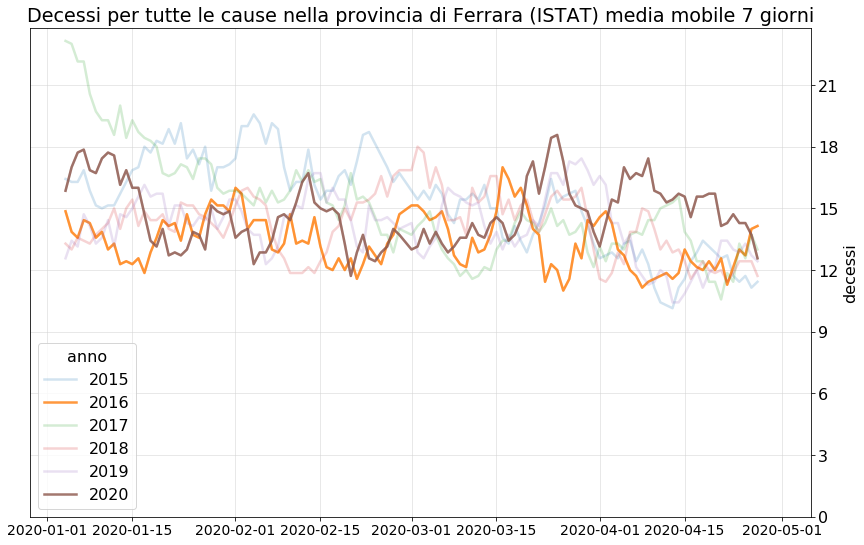

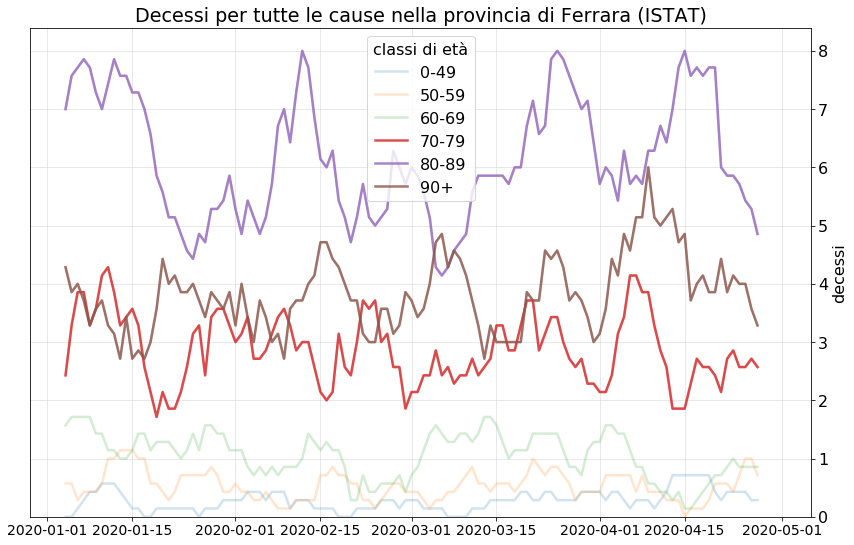

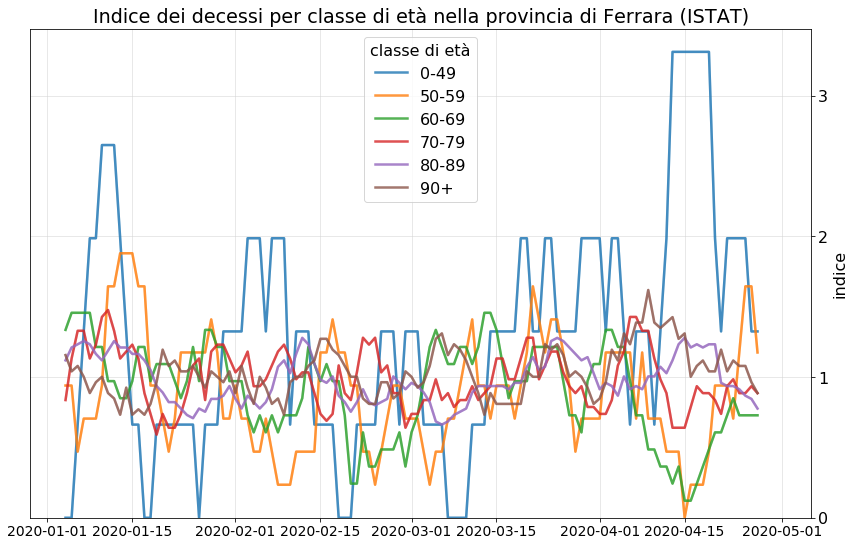

In [16]:
provincia = 'Ferrara'
FI = (None, '2020-04-30')
window = 7

istat_provincia = istat.groupby('province').sum().sel(province=provincia, year=2020)
istat_provincia_frazione = istat_provincia / istat_provincia.sel(time=slice('2020-01-01', '2020-02-20')).fillna(0).mean('time')

istat_provincia_anni = istat.sel(time=istat['time'] != np.datetime64('2020-02-29')).groupby('province').sum().sel(province=provincia).sum('age_class')
ax = covid19.plot.plot_xarray(istat_provincia_anni, window=window, hue='year', foreground_interval=FI, foreground_hue=[2016, 2020])
_ = ax.set(
    title=f'Decessi per tutte le cause nella provincia di {provincia} (ISTAT) media mobile {window} giorni',
    ylabel='decessi',
)
_ = ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
_ = ax.legend(title='anno')

ax = covid19.plot.plot_xarray(istat_provincia, window=window, foreground_interval=FI, foreground_hue=['70-79', '80-89', '90+'])
_ = ax.set(
    title=f'Decessi per tutte le cause nella provincia di {provincia} (ISTAT)',
    ylabel='decessi'
)
_ = ax.legend(title='classi di età')


ax = covid19.plot.plot_xarray(istat_provincia_frazione, window=window, foreground_interval=FI)
_ = ax.set(
    title=f'Indice dei decessi per classe di età nella provincia di {provincia} (ISTAT)',
    ylabel='indice',
)
_ = ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
_ = ax.legend(title='classe di età')


# istat_provincia_anni.sel(time='2020-03').sum('time')

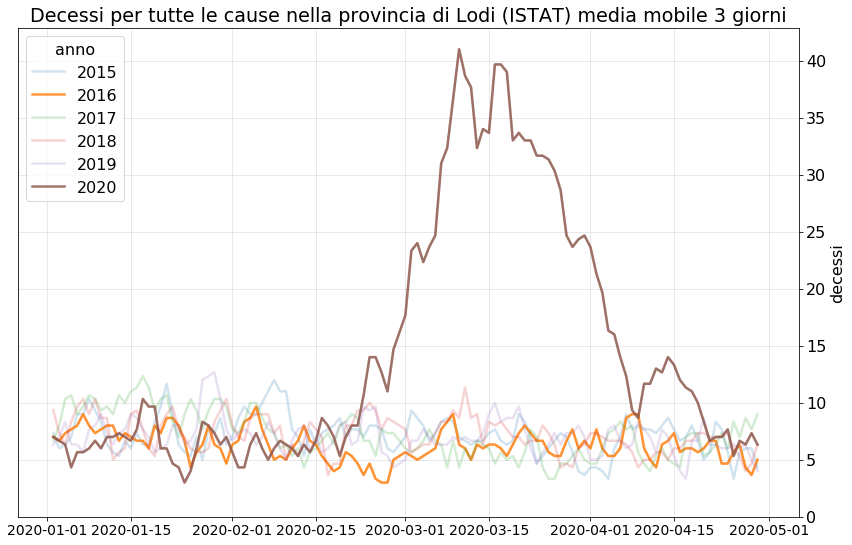

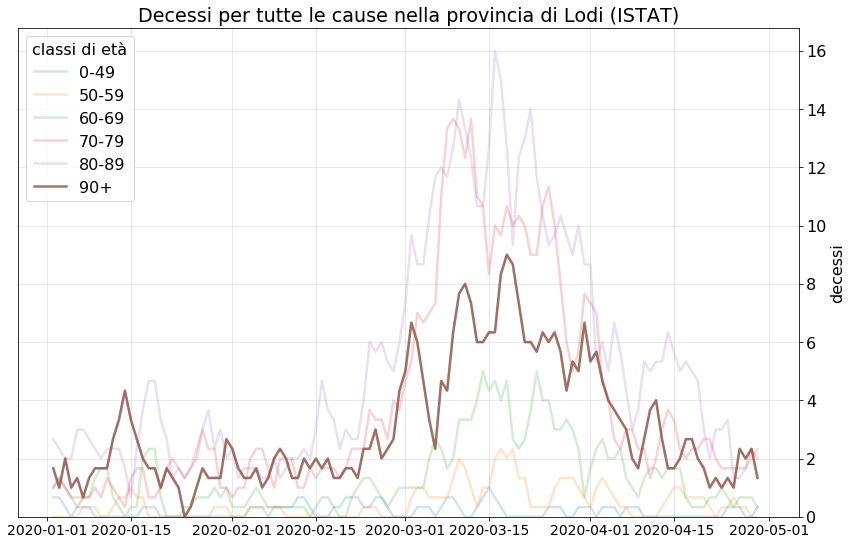

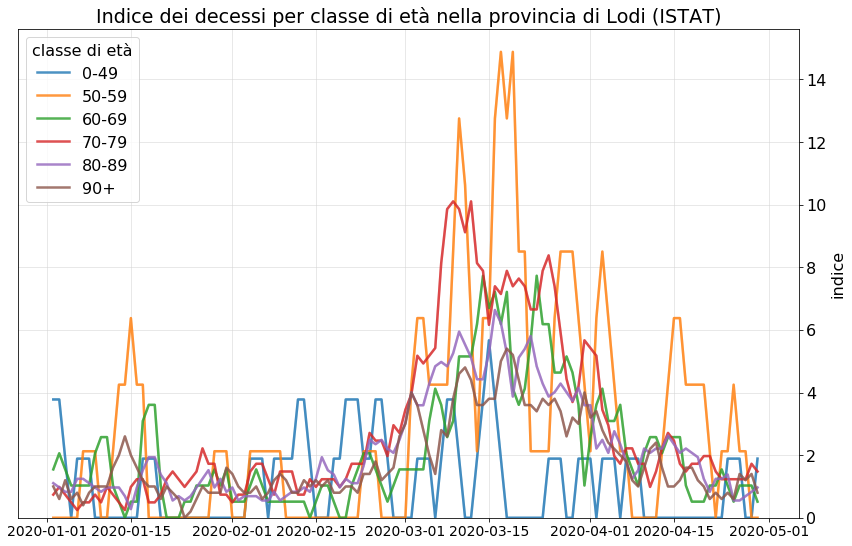

In [113]:
provincia = "Lodi"
FI = (None, '2020-04-30')
window = 3

istat_provincia = istat.groupby('province').sum().sel(province=provincia, year=2020)
istat_provincia_frazione = istat_provincia / istat_provincia.sel(time=slice('2020-01-01', '2020-02-20')).fillna(0).mean('time')

istat_provincia_anni = istat.sel(time=istat['time'] != np.datetime64('2020-02-29')).groupby('province').sum().sel(province=provincia).sum('age_class')
ax = covid19.plot.plot_xarray(istat_provincia_anni, window=window, hue='year', foreground_interval=FI, foreground_hue=[2016, 2020])
_ = ax.set(
    title=f'Decessi per tutte le cause nella provincia di {provincia} (ISTAT) media mobile {window} giorni',
    ylabel='decessi',
)
_ = ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
_ = ax.legend(title='anno')

ax = covid19.plot.plot_xarray(istat_provincia, window=window, foreground_interval=FI, foreground_hue=['90+'])
_ = ax.set(
    title=f'Decessi per tutte le cause nella provincia di {provincia} (ISTAT)',
    ylabel='decessi'
)
_ = ax.legend(title='classi di età')


ax = covid19.plot.plot_xarray(istat_provincia_frazione, window=window, foreground_interval=FI)
_ = ax.set(
    title=f'Indice dei decessi per classe di età nella provincia di {provincia} (ISTAT)',
    ylabel='indice',
)
_ = ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
_ = ax.legend(title='classe di età')


# istat_provincia_anni.sel(time='2020-03').sum('time')